In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random as random

In [ ]:
def modularity(G, partition):
    m = G.number_of_edges()
    Q = 0

    for community in partition:
        for i in community:
            for j in community:
                if i != j:
                    ki = len(list(G.neighbors(i)))
                    kj = len(list(G.neighbors(j)))
                    Aij = int(G.has_edge(i,j))
                    Q += (Aij - ki*kj/(2*m))

    Q = Q/(2*m)
    return Q

In [ ]:
def community_clustering(G):
  NUM_ITERATIONS = 15
  for i in range(NUM_ITERATIONS):
    edge_betweenness = nx.edge_betweenness_centrality(G).items()
    edge_to_delete = sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]

    G.remove_edge(*edge_to_delete)
    partition = list(nx.connected_components(G))
    modularity_score = modularity(G, partition)

    clusterCount = len(partition)

    """
        Color nodes in same community
    """
    color_map = {}
    color_final=[]
    for community in partition:
      color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
      for node in community:
            color_map[node] = color
    for node in G.nodes():
        color_final.append(color_map.get(node))


    nx.draw(G, with_labels=True, node_color=color_final)
    plt.title('Step %s\nEdge %s Deleted\nNumber of Clusters: %s \nCommunities: %s\nModularity: %s'%(i, edge_to_delete, clusterCount, partition, modularity_score), fontsize=12)

    plt.show()

In [ ]:
G = nx.karate_club_graph()
nx.draw(G, with_labels = True)

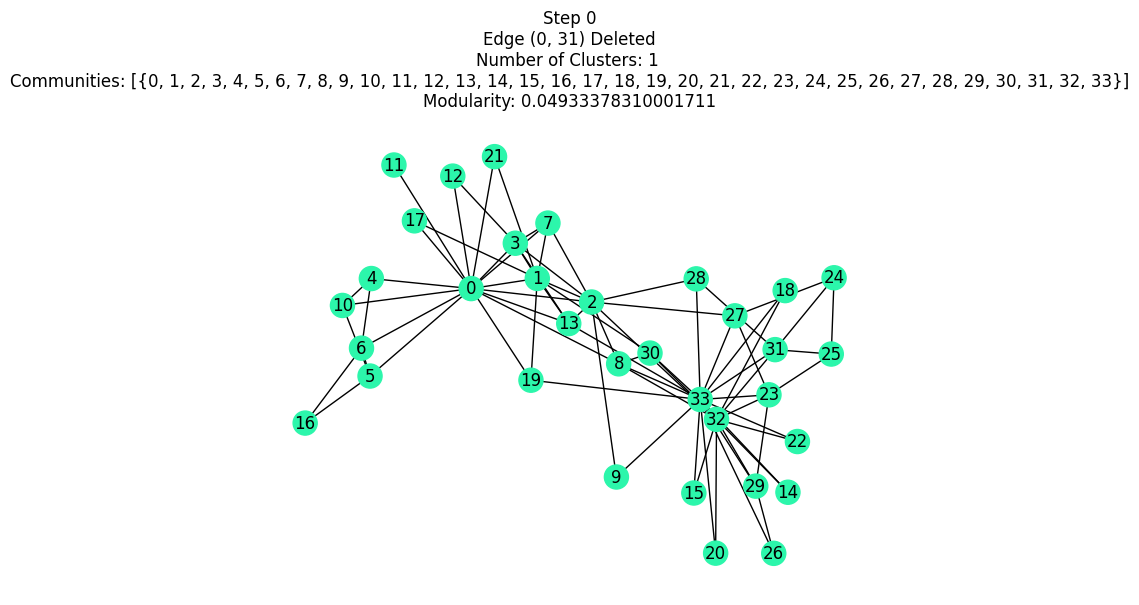

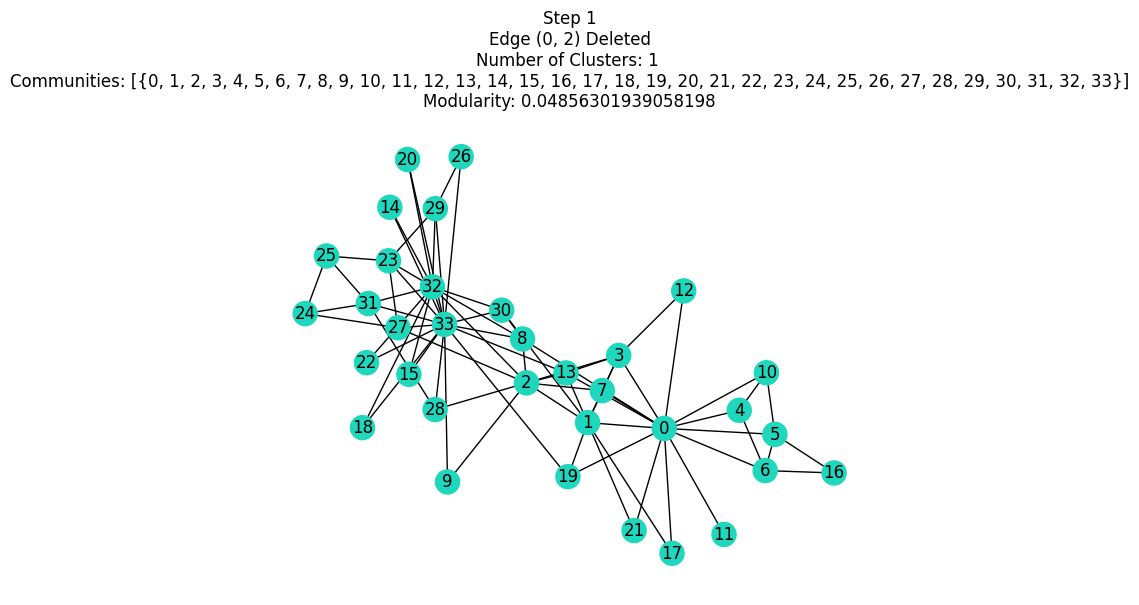

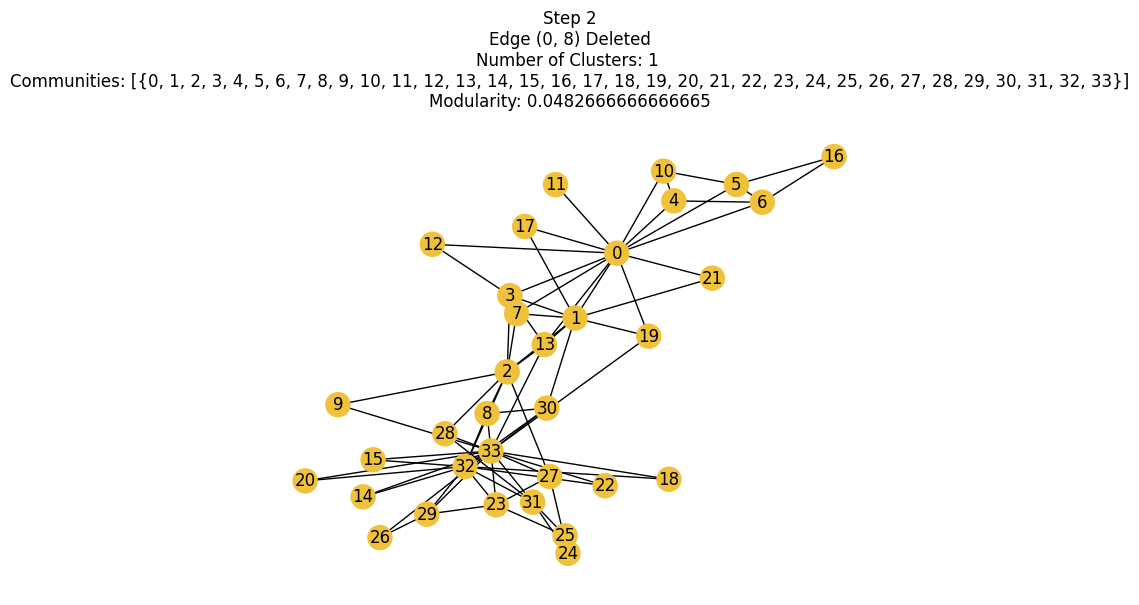

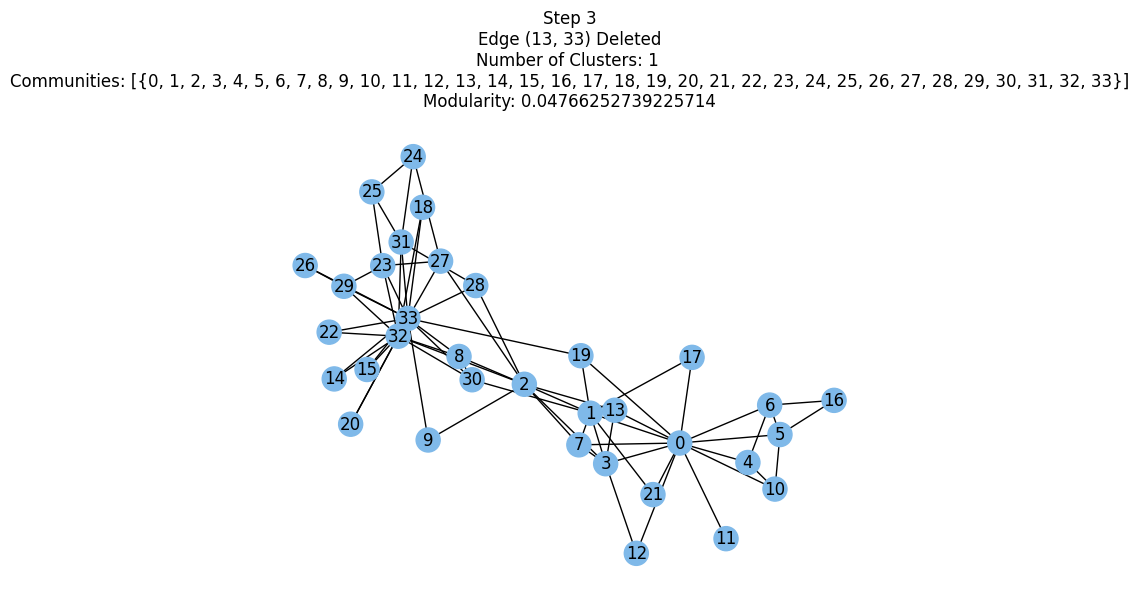

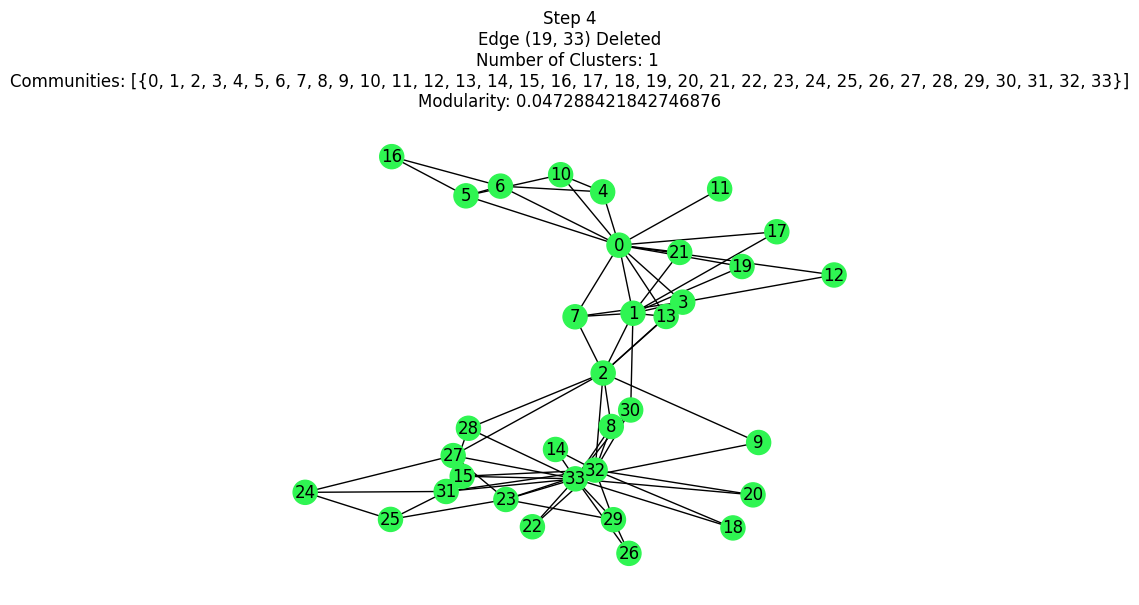

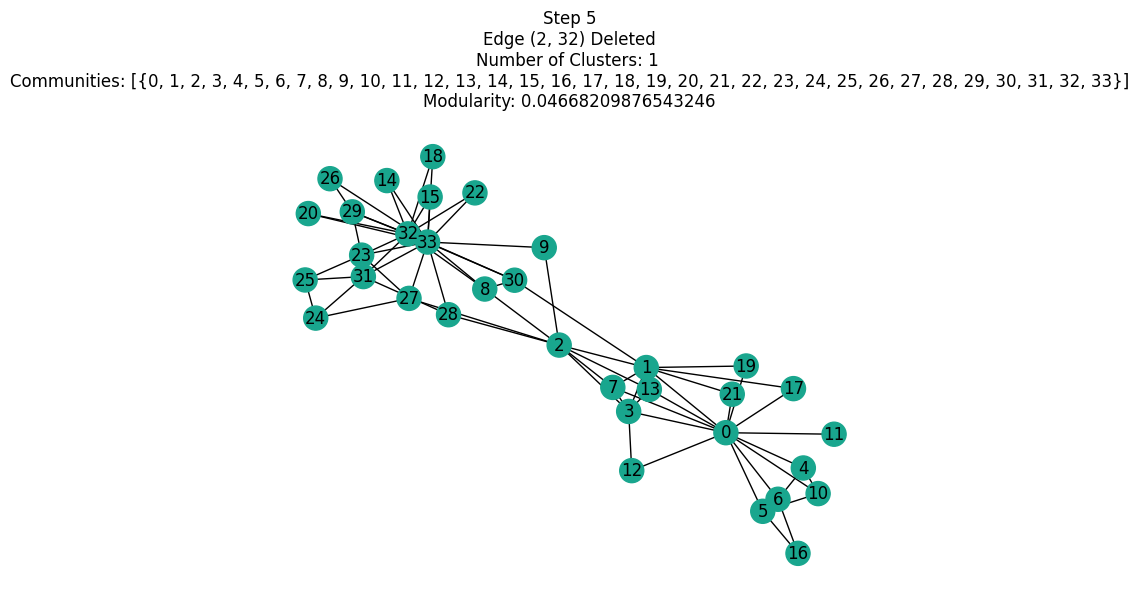

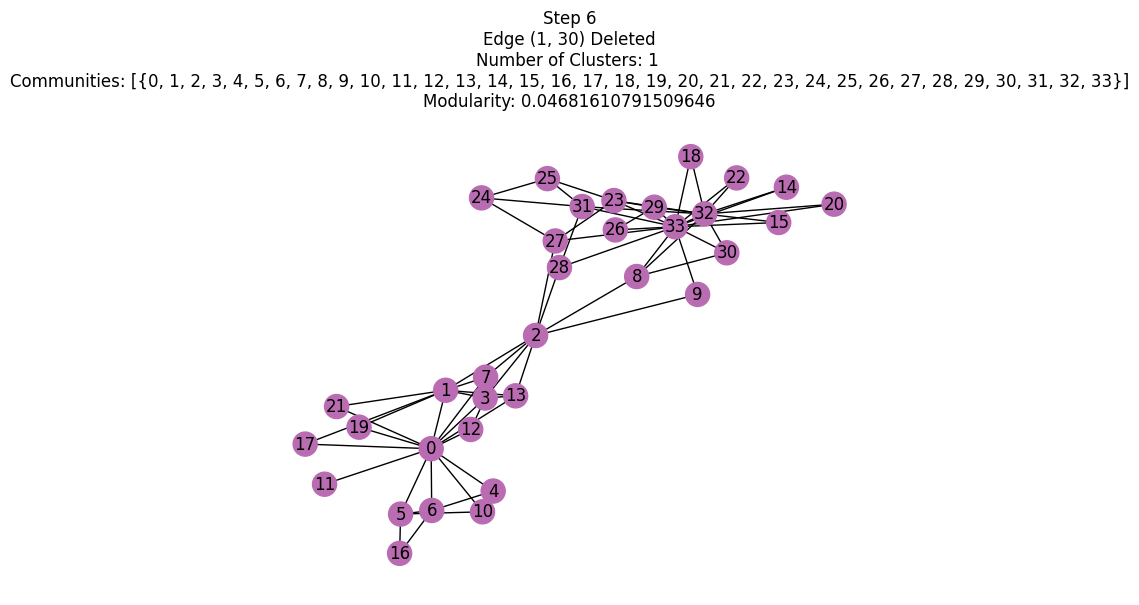

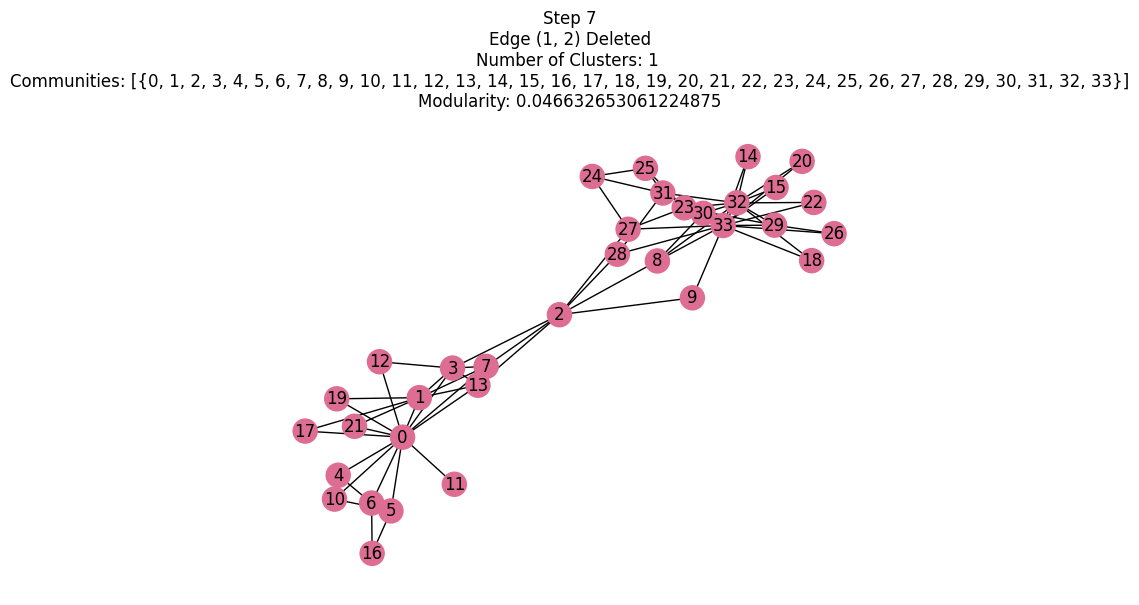

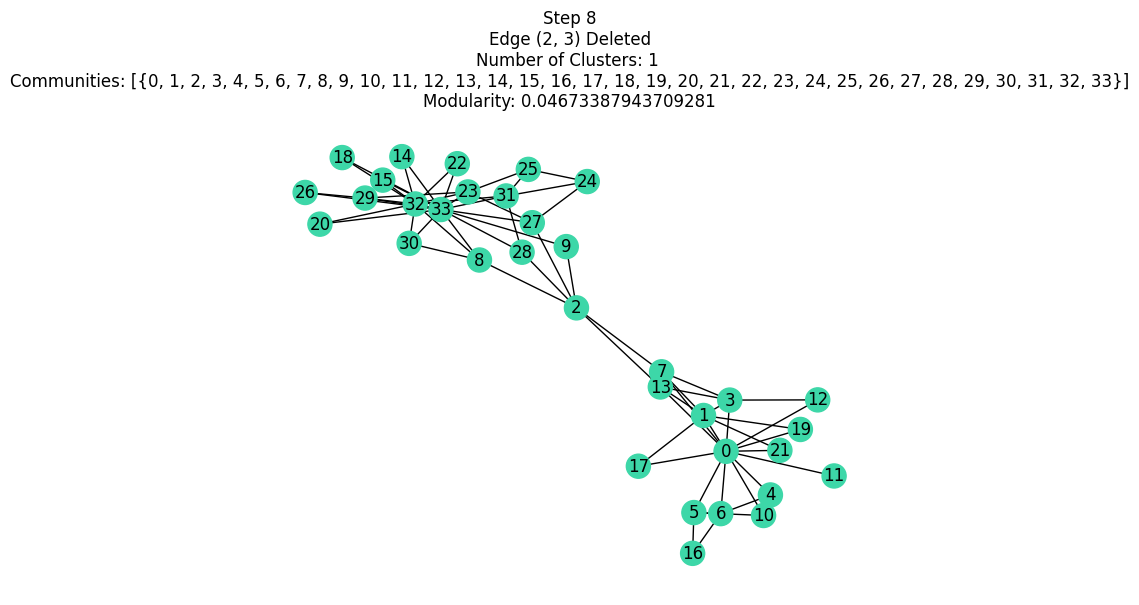

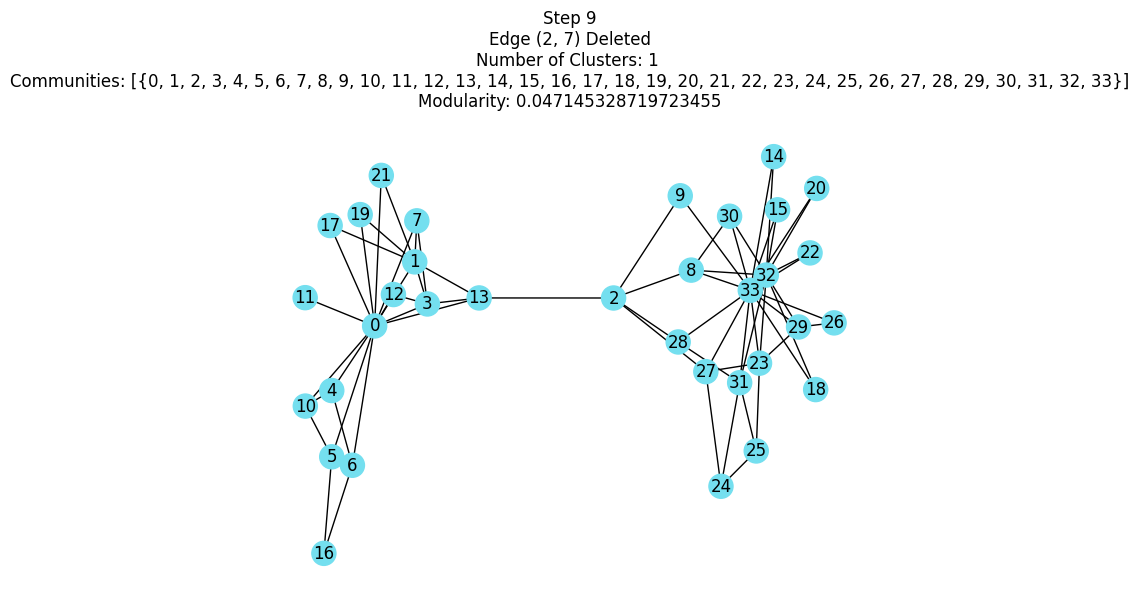

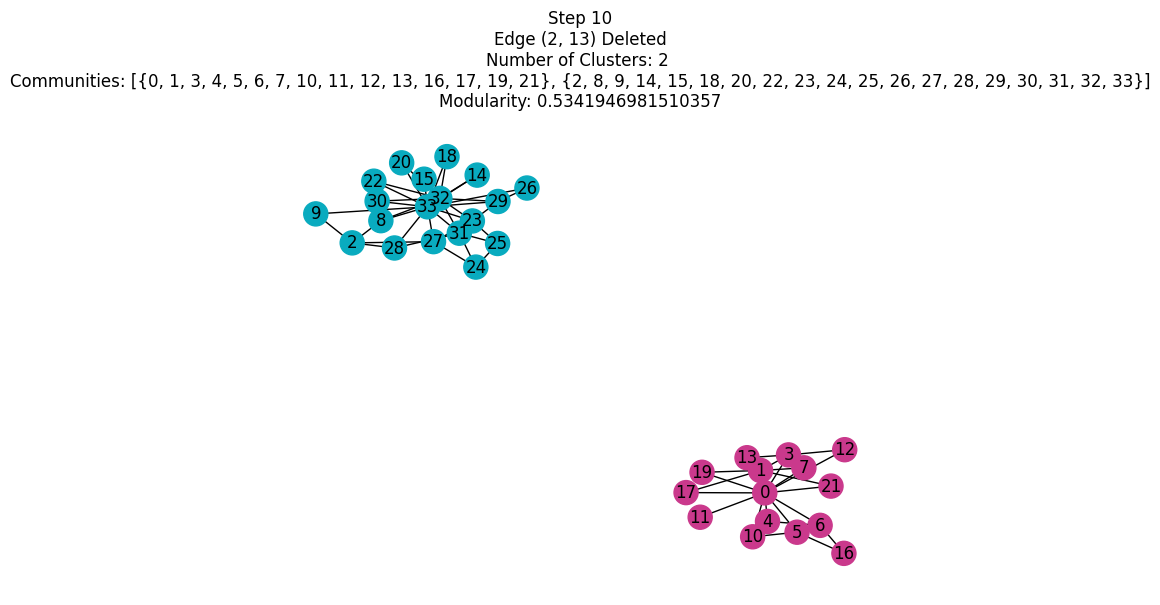

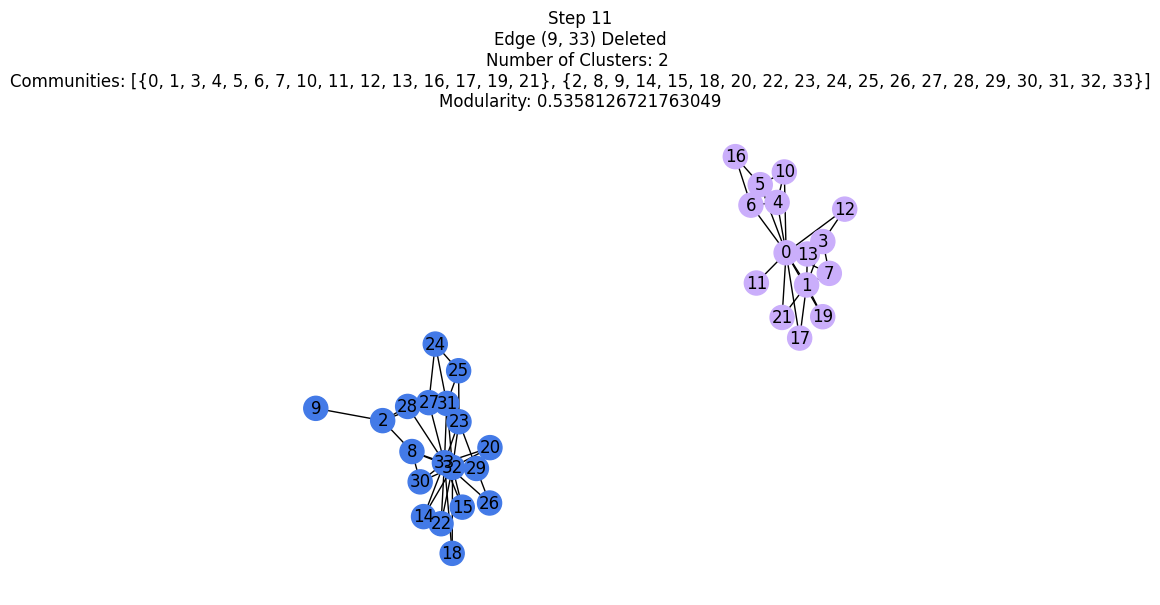

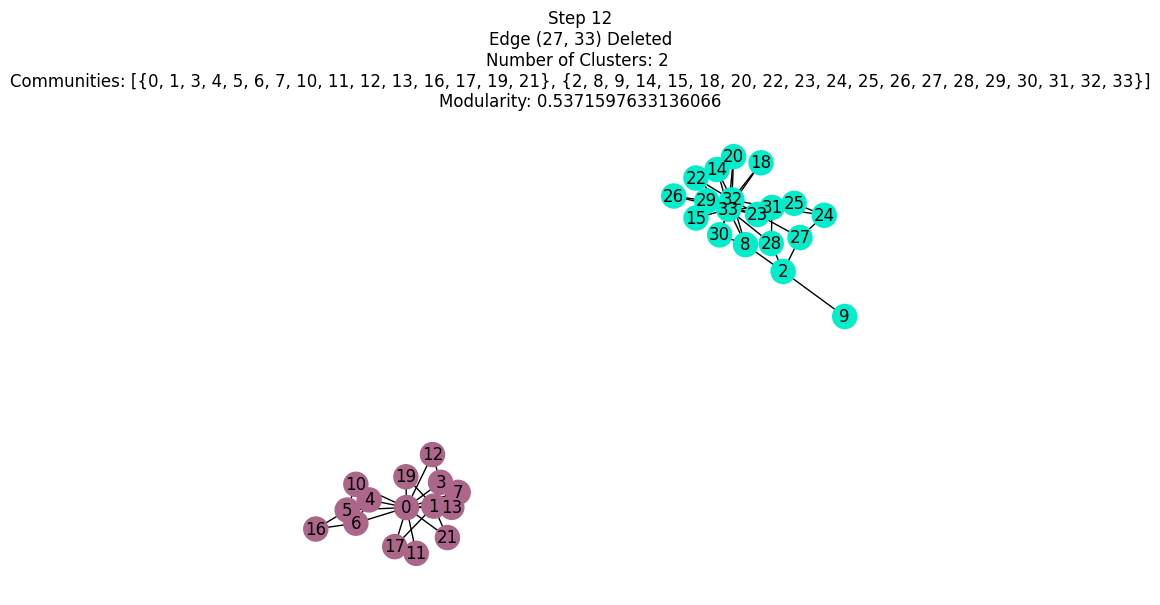

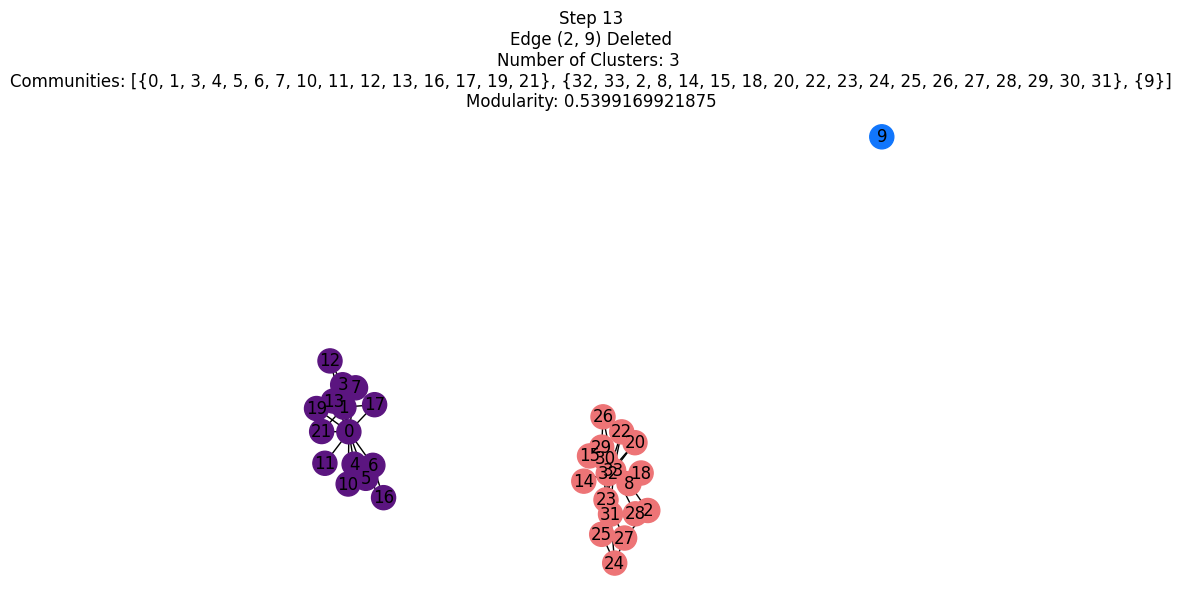

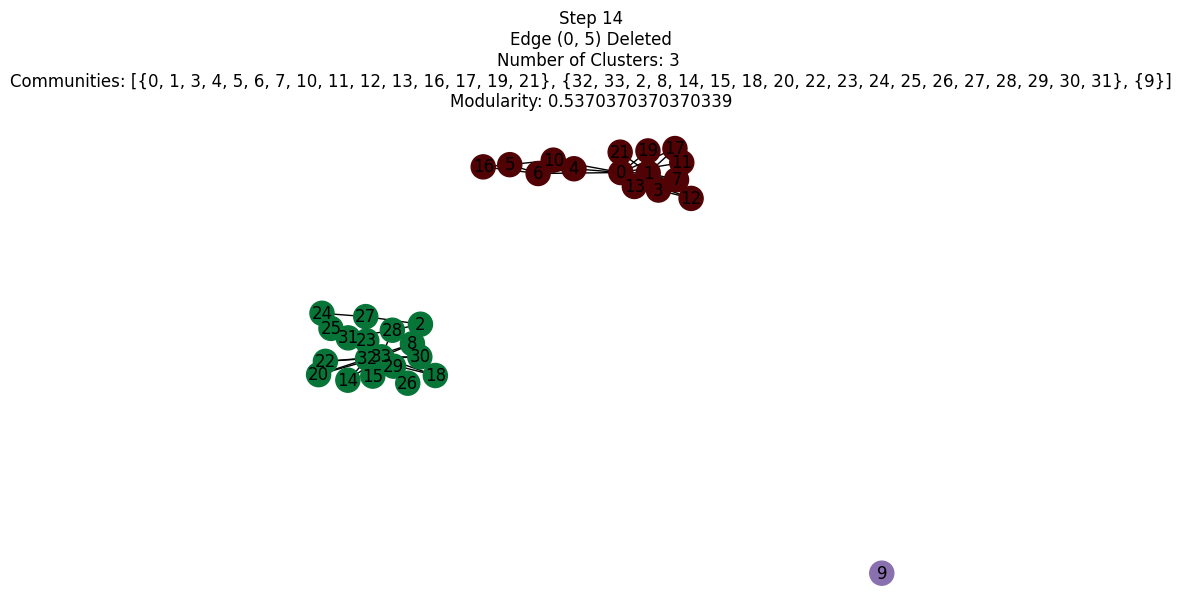

In [ ]:
community_clustering(G)